# Кластеризация

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

%matplotlib inline

### 1. Загрузите датасет mall_customers.

In [3]:
df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Пустые значения отсутствуют

### 3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

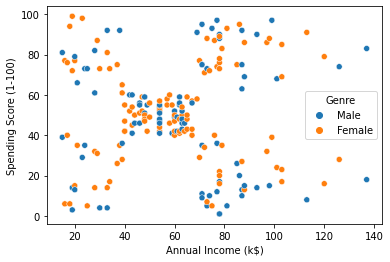

In [5]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", hue="Genre", data=df, ax=ax)
plt.show()

По графику видно, что сумма трат не зависит от пола. Кроме того, данные хорошо делятся на 5 классов

### 4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [6]:
# Создадим датафрейм с Annual Income и Spending Score

annual_income_df = df.iloc[:,[3,4]]
annual_income_df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
values_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(age_df) 
    values_list.append(kmeans.inertia_)

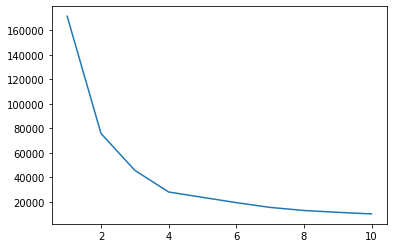

In [ ]:
plt.plot(range(1,11),values_list)
plt.show()

In [7]:
values_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state = 0)
    kmeans.fit(annual_income_df) 
    values_list.append(kmeans.inertia_)

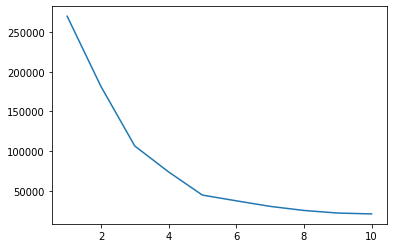

In [8]:
plt.plot(range(1,11), values_list)
plt.show()

Последняя точка, после которой график перестает существенно меняться - 5 классов

### 5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [10]:
# Получаем кластеры

kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 0)
predicted = kmeans.fit_predict(annual_income_df)
predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [11]:
items_list = zip(predicted, annual_income_df["Annual Income (k$)"].to_list(), annual_income_df["Spending Score (1-100)"].to_list())
for predict, income, score  in items_list:
    print(f"Класс: {predict}, income: {income}, score: {score}")

Класс: 4, income: 15, score: 39
Класс: 3, income: 15, score: 81
Класс: 4, income: 16, score: 6
Класс: 3, income: 16, score: 77
Класс: 4, income: 17, score: 40
Класс: 3, income: 17, score: 76
Класс: 4, income: 18, score: 6
Класс: 3, income: 18, score: 94
Класс: 4, income: 19, score: 3
Класс: 3, income: 19, score: 72
Класс: 4, income: 19, score: 14
Класс: 3, income: 19, score: 99
Класс: 4, income: 20, score: 15
Класс: 3, income: 20, score: 77
Класс: 4, income: 20, score: 13
Класс: 3, income: 20, score: 79
Класс: 4, income: 21, score: 35
Класс: 3, income: 21, score: 66
Класс: 4, income: 23, score: 29
Класс: 3, income: 23, score: 98
Класс: 4, income: 24, score: 35
Класс: 3, income: 24, score: 73
Класс: 4, income: 25, score: 5
Класс: 3, income: 25, score: 73
Класс: 4, income: 28, score: 14
Класс: 3, income: 28, score: 82
Класс: 4, income: 28, score: 32
Класс: 3, income: 28, score: 61
Класс: 4, income: 29, score: 31
Класс: 3, income: 29, score: 87
Класс: 4, income: 30, score: 4
Класс: 3, inc

### 6. Построить графическую интерпретацию из пункта 3,  с центрами кластеров.

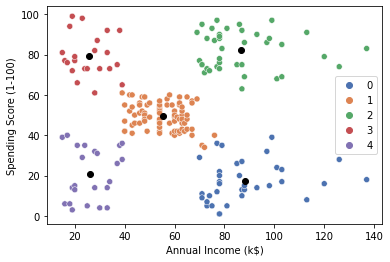

In [12]:
f, ax = plt.subplots()
sns.scatterplot(x=annual_income_df['Annual Income (k$)'], y=annual_income_df['Spending Score (1-100)'], hue=predicted, palette="deep", data=annual_income_df, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')
plt.show()

Модель разделила данные на 5 классов, которые мы визуально и предполагали на графике. Эти данные можно использовать, например, для банковских предложений.

0 - Клиенты с высоким доходом и низкими расходами (Можно предложить вклады и накопительные счета)

1 - Среднестатистические люди со средним доходом (Можно использовать больше рекламы)

2 - Клиенты с высоким доходом и высокими расходами (Можно предложить карты с повышенным процентом кешбека)

3 - Клиенты с низким доходом и высокими расходами (Видимо,  богатые родители)

4 - Клиенты с низким доходом и низкими расходами (Можно предложить, например, ипотеку. Люди не смогут позволить сразу потратить большую сумму на покупку недвижимости, но согласятся на небольшие регулярные выплаты)

### 7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score

In [13]:
# Создадим датафрейм с Age и Spending Score

age_df = df.iloc[:,[2,4]]
age_df

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [14]:
values_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(age_df) 
    values_list.append(kmeans.inertia_)

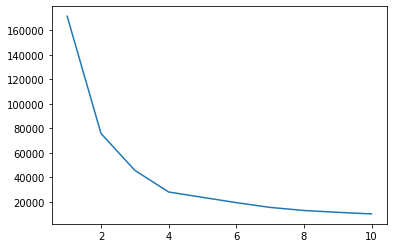

In [15]:
plt.plot(range(1,11),values_list)
plt.show()

Для этой зависимости оптимальное число классов равно 4

In [16]:
# Получем кластеры

kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=0)
predicted = kmeans2.fit_predict(age_df)
print(predicted)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [17]:
items_list = zip(predicted, age_df["Age"].to_list(), age_df["Spending Score (1-100)"].to_list())
for predict, income, score  in items_list:
    print(f"Класс: {predict}, age: {income}, score: {score}")

Класс: 2, age: 19, score: 39
Класс: 1, age: 21, score: 81
Класс: 0, age: 20, score: 6
Класс: 1, age: 23, score: 77
Класс: 2, age: 31, score: 40
Класс: 1, age: 22, score: 76
Класс: 0, age: 35, score: 6
Класс: 1, age: 23, score: 94
Класс: 0, age: 64, score: 3
Класс: 1, age: 30, score: 72
Класс: 0, age: 67, score: 14
Класс: 1, age: 35, score: 99
Класс: 0, age: 58, score: 15
Класс: 1, age: 24, score: 77
Класс: 0, age: 37, score: 13
Класс: 1, age: 22, score: 79
Класс: 2, age: 35, score: 35
Класс: 2, age: 20, score: 66
Класс: 0, age: 52, score: 29
Класс: 1, age: 35, score: 98
Класс: 2, age: 35, score: 35
Класс: 1, age: 25, score: 73
Класс: 0, age: 46, score: 5
Класс: 1, age: 31, score: 73
Класс: 0, age: 54, score: 14
Класс: 1, age: 29, score: 82
Класс: 0, age: 45, score: 32
Класс: 2, age: 35, score: 61
Класс: 0, age: 40, score: 31
Класс: 1, age: 23, score: 87
Класс: 0, age: 60, score: 4
Класс: 1, age: 21, score: 73
Класс: 0, age: 53, score: 4
Класс: 1, age: 18, score: 92
Класс: 0, age: 49, s

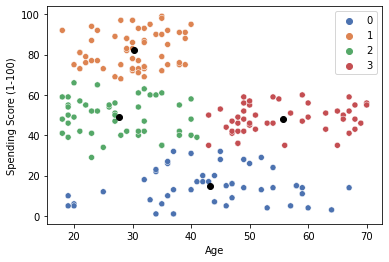

In [19]:
# Снова строим график

f, ax = plt.subplots()
sns.scatterplot(x=age_df['Age'], y=age_df['Spending Score (1-100)'], hue=predicted, palette="deep", data=age_df, ax=ax)
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='black')
plt.show()

Более молодые люди делятся на большее количество классов по тратам. Кроме того, у нас имеется пропуск данных по людям в возрасте, которые много тратят. Это может означать либо отсутствие данных по каким-либо причинам, либо то, что с возрастом траты людей уменьшаются

### 8. Оцените модель с помощью метрик.

In [21]:
# расстояние разделения между кластерами, стремится к 1 в лучшем случае
print(silhouette_score(age_df, predicted))

0.49973941540141753


In [23]:
# критерий соотношения дисперсий
print(calinski_harabasz_score(age_df, predicted))

332.5631268443306


### 9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [25]:
for n_clusters in range(2, 10):
    
    kmeans2 = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    predicted = kmeans2.fit_predict(age_df)
    centers = kmeans2.cluster_centers_
    
    s_score = silhouette_score(age_df, predicted)
    ch_score = calinski_harabasz_score(age_df, predicted)
    print(f"Число кластеров: {n_clusters}, silhouette score: {s_score}, calinski_harabasz_score: {ch_score})")

Число кластеров: 2, silhouette score: 0.4692341232501655, calinski_harabasz_score: 249.19429134176448)
Число кластеров: 3, silhouette score: 0.45300127016521263, calinski_harabasz_score: 270.0863298113398)
Число кластеров: 4, silhouette score: 0.49973941540141753, calinski_harabasz_score: 332.5631268443306)
Число кластеров: 5, silhouette score: 0.44526667994351227, calinski_harabasz_score: 302.4394405378254)
Число кластеров: 6, silhouette score: 0.4405479018621985, calinski_harabasz_score: 302.46952193907464)
Число кластеров: 7, silhouette score: 0.40833321946277396, calinski_harabasz_score: 321.55913801827427)
Число кластеров: 8, silhouette score: 0.4290264154541208, calinski_harabasz_score: 332.19774974353555)
Число кластеров: 9, silhouette score: 0.4119906277658083, calinski_harabasz_score: 329.6446137896869)


Лучшие показатели при количестве кластеров, равном 4, как мы и выбрали изначально